# Important
- set netlist directory in xschem: -> simulation -> set netlist dir
- run netlist from xschem (upper right corner)

load libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NMOS
rewrite the spice param file nmos.sch is loading

In [2]:
%%writefile ../design/nmos_param.spice

.param vds = 1.8
.param vbs = 0
.param L = 0.5
.param W = 10
.param F = 1
.param M = 1
.dc vgs 0 1.8 0.01

Overwriting ../design/nmos_param.spice


simulate

In [3]:
%system ngspice -b ../design/nmos.spice

['',
 'Note: No compatibility mode selected!',
 '',
 '',
 'Circuit: ** sch_path: /home/ttuser/work/tt08-analog-template/work/design/nmos.sch',
 '',
 'Doing analysis at TEMP = 27.000000 and TNOM = 27.000000',
 '',
 ' Reference value :  0.00000e+00',
 'No. of Data Rows : 181',
 'Doing analysis at TEMP = 27.000000 and TNOM = 27.000000',
 '',
 '',
 'No. of Data Rows : 181',
 'Note: Simulation executed from .control section ']

load results

In [4]:
nm = pd.read_csv('sweep_nmos.dat', sep='\s+')
nm.columns = [ 'vgs', 'id', 'vth', 'vdsat', 'gm', 'gmbs', 'gds', 
               'cbb', 'csb', 'cdb', 'cgb', 'css', 'csd', 'csg', 
               'cds', 'cdd', 'cdg', 'cbs', 'cbd', 'cbg', 'cgd',
               'cgs', 'cgg', 'capbs', 'capbd' ]

nm_lvt = pd.read_csv('sweep_nmos_lvt.dat', sep='\s+')
nm_lvt.columns = [ 'vgs', 'id', 'vth', 'vdsat', 'gm', 'gmbs', 'gds', 
               'cbb', 'csb', 'cdb', 'cgb', 'css', 'csd', 'csg', 
               'cds', 'cdd', 'cdg', 'cbs', 'cbd', 'cbg', 'cgd',
               'cgs', 'cgg', 'capbs', 'capbd' ]


In [5]:
print(nm.columns)

Index(['vgs', 'id', 'vth', 'vdsat', 'gm', 'gmbs', 'gds', 'cbb', 'csb', 'cdb',
       'cgb', 'css', 'csd', 'csg', 'cds', 'cdd', 'cdg', 'cbs', 'cbd', 'cbg',
       'cgd', 'cgs', 'cgg', 'capbs', 'capbd'],
      dtype='object')


In [6]:
#print(nm.vgs)

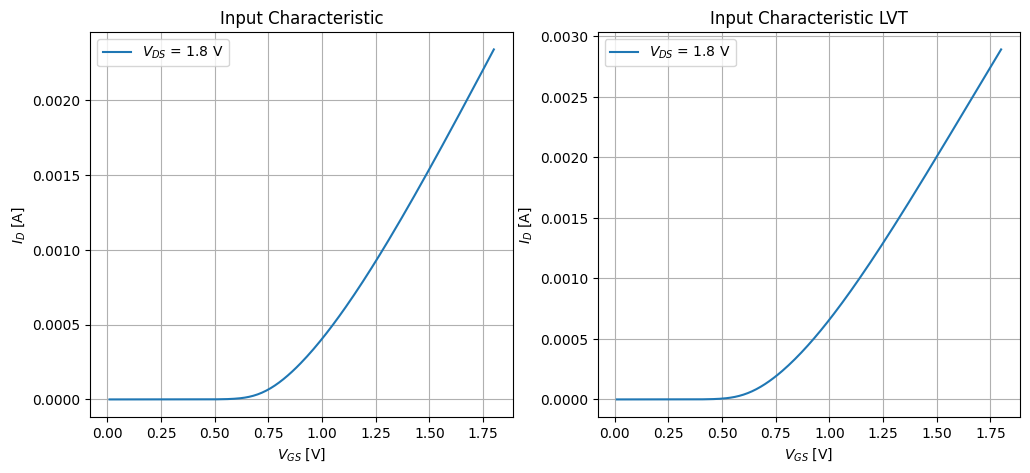

In [7]:
fig, nmos_input_characteristic = plt.subplots(ncols=2, figsize=(12,5))
nmos_input_characteristic[0].plot(nm.vgs,  nm.id, label='$V_{DS}$ = 1.8 V')
nmos_input_characteristic[0].set_xlabel('$V_{GS}$ [V]')
nmos_input_characteristic[0].set_ylabel('$I_D$ [A]')
nmos_input_characteristic[0].grid()
nmos_input_characteristic[0].set_title('Input Characteristic')
nmos_input_characteristic[0].legend()

nmos_input_characteristic[1].plot(nm_lvt.vgs,  nm_lvt.id, label='$V_{DS}$ = 1.8 V')
nmos_input_characteristic[1].set_xlabel('$V_{GS}$ [V]')
nmos_input_characteristic[1].set_ylabel('$I_D$ [A]')
nmos_input_characteristic[1].grid()
nmos_input_characteristic[1].set_title('Input Characteristic LVT')
nmos_input_characteristic[1].legend()

# Output Characteristics with multiple $V_{GS}$

In [8]:
%%writefile ../design/nmos_outchar_param.spice

.param vgs = 0.8
.param vbs = 0
.param L = 0.5
.param W = 10
.param F = 1
.param M = 1
.dc vds 0 1.8 0.01

Overwriting ../design/nmos_outchar_param.spice


In [25]:
i = 0
curve_count = 10
id_nm = [None] * curve_count
id_nm_lvt = [None] * curve_count
vgs_nm = [None] * curve_count
vgs_nm_lvt = [None] * curve_count


vgs_steps_vector = np.linspace(0, 1.8, curve_count)
for vgs_step in vgs_steps_vector:
    
    with open('../design/nmos_outchar_param.spice', 'w') as file:
    # write vgs using the str() function (repr(vsg_step.astype(str)) does not work)
        file.write(".param vgs = " + str(vgs_step) + '\n')
        file.write(".param vbs = 0" + '\n'
                + ".param L = 0.5" + '\n'
                + ".param W = 10" + '\n'
                + ".param F = 1" + '\n'
                + ".param M = 1" + '\n'
                + ".dc vds 0 1.8 0.01")
        file.close()
    %system ngspice -b ../design/nmos_outchar.spice

    nm_outchar = pd.read_csv('sweep_nmos_outchar.dat', sep='\s+')
    nm_outchar.columns = ['vds', 'id', 'vth', 'vdsat']

    nm_lvt_outchar = pd.read_csv('sweep_nmos_lvt_outchar.dat', sep='\s+')
    nm_lvt_outchar.columns = ['vds', 'id', 'vth', 'vdsat']

    id_nm[i] = nm_outchar.id
    id_nm_lvt[i] = nm_lvt_outchar.id

    i=i+1



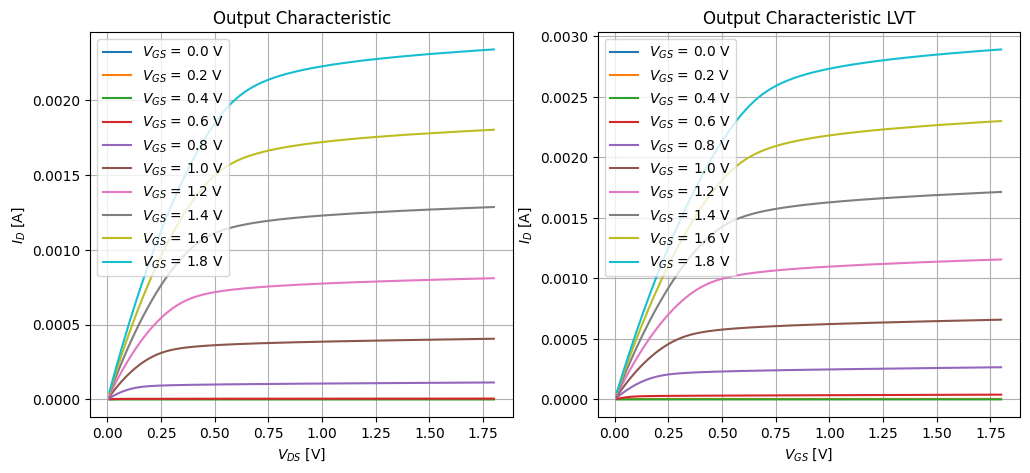

In [29]:
fig, nmos_output_characteristic = plt.subplots(ncols=2, figsize=(12,5))
for j in range(len(id_nm)):
    nmos_output_characteristic[0].plot(nm_outchar.vds,  id_nm[j], label='$V_{GS}$ = ' + str(round(vgs_steps_vector[j],2)) + ' V')
nmos_output_characteristic[0].set_xlabel('$V_{DS}$ [V]')
nmos_output_characteristic[0].set_ylabel('$I_D$ [A]')
nmos_output_characteristic[0].grid()
nmos_output_characteristic[0].set_title('Output Characteristic')
nmos_output_characteristic[0].legend()

for j in range(len(id_nm_lvt)):
    nmos_output_characteristic[1].plot(nm_lvt_outchar.vds,  id_nm_lvt[j], label='$V_{GS}$ = ' + str(round(vgs_steps_vector[j],2)) + ' V')
nmos_output_characteristic[1].set_xlabel('$V_{GS}$ [V]')
nmos_output_characteristic[1].set_ylabel('$I_D$ [A]')
nmos_output_characteristic[1].grid()
nmos_output_characteristic[1].set_title('Output Characteristic LVT')
nmos_output_characteristic[1].legend()

#nmos_output_characteristic.show()

# Used Files

## nmos_outchar_param.spice:
.param vgs = 1.8\
.param vbs = 0\
.param L = 0.5\
.param W = 10\
.param F = 1\
.param M = 1\
.dc vds 0 1.8 0.01

## nmos_outchar_ctrl.spice:

.control\
    set wr_singlescale\
    option numdgt = 4\
    save @m.xm2.msky130_fd_pr__nfet_01v8_lvt[id]\
    save @m.xm2.msky130_fd_pr__nfet_01v8_lvt[vth]\
    save @m.xm2.msky130_fd_pr__nfet_01v8_lvt[vdsat]\
    \
    run\
    wrdata sweep_nmos_lvt_outchar.dat\
    + @m.xm2.msky130_fd_pr__nfet_01v8_lvt[id]\
    + @m.xm2.msky130_fd_pr__nfet_01v8_lvt[vth]\
    + @m.xm2.msky130_fd_pr__nfet_01v8_lvt[vdsat]\
    \
    save @m.xm1.msky130_fd_pr__nfet_01v8[id]\
    save @m.xm1.msky130_fd_pr__nfet_01v8[vth]\
    save @m.xm1.msky130_fd_pr__nfet_01v8[vdsat]\
    \
    run\
    wrdata sweep_nmos_outchar.dat\
    + @m.xm1.msky130_fd_pr__nfet_01v8[id]\
    + @m.xm1.msky130_fd_pr__nfet_01v8[vth]\
    + @m.xm1.msky130_fd_pr__nfet_01v8[vdsat]\
.endc

## Schematic

![alt text](nmos_outchar_sch.png "nmos_outchar.sch")